#1:A Classification Decision Tree is a type of machine learning model used to solve classification problems. In a classification problem, the goal is to predict a categorical label for a given input. The input consists of features (variables), and the model's task is to assign a specific class label (such as "yes" or "no," or "cat" or "dog") based on those features.

Classification Decision Trees in the Real World:

MEDICAL DIAGNOSIS: Predicting whether a patient has a particular disease based on symptoms and test results. For example, a decision tree can help predict whether a patient has diabetes based on characteristics such as age, weight, and blood sugar levels.

#2:
1. Accuracy
Practical application: Spam detection

Rationale: Accuracy is a good metric:

Accuracy is a good metric in the context of category balancing. In the case of spam detection, if the number of spam and non-spam is roughly equal, the accuracy rate is a good measure of the model's ability to identify spam and non-spam. The accuracy rate can fully reflect the correctness of the model's prediction.

2. Sensitivity (Recall)
Practical application: Medical diagnosis (e.g. cancer detection)

Rationale:

Sensitivity is critical when you need to capture as many positive cases as possible, even at the risk of false positives. In cancer detection, missing a cancer case (false negative) can be fatal, so sensitivity must be maximised. It focuses on identifying all actual positive cases (cancer patients) and minimising the chances of missed detection.

3. Specificity
Practical application: Medical testing (e.g., disease diagnosis)

Rationale:

Specificity is important when the goal is to correctly identify negative cases and avoid false positive cases. In disease testing, specificity helps to ensure that people who do not have the disease (who are actually negative) are not misdiagnosed as having the disease. For example, in rare disease testing, it is critical to avoid misdiagnosing healthy people as sick (false positives), as this can lead to unnecessary treatment or anxiety.

4. Accuracy
Practical Application: Fraud Detection in Banking Industry

Rationale:

Accuracy is especially important when the cost of false alarms (incorrectly predicting events) is high. In fraud detection, if legitimate transactions are incorrectly labelled as fraudulent, this can inconvenience customers and lead to false positives. High accuracy ensures that models are more likely to be accurate in predicting fraud, thereby reducing the number of false positives. This is essential to minimise customer disruption and maintain trust in the system.

In [17]:
#3:
import pandas as pd
import numpy as np

# Read the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove the 'Weight_oz', 'Width', and 'Height' columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Step 2: Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Convert 'Pub year' and 'NumPages' to integer type
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Step 4: Convert 'Hard_or_Paper' to a categorical type
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows to verify
ab_reduced_noNaN.head()


/tmp/ipykernel_71/3889581892.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_71/3889581892.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_71/3889581892.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4


#4:
The following steps outline what we are going to do and why. You can tell the chatbot that you want to fit a decision tree classifier model and ask it to explain what each of the following steps does:

Step 1: clf = DecisionTreeClassifier(max_depth=2)
This initialises the Decision Tree Classifier model and specifies that the maximum depth of the decision tree is 2. This limits the number of splits in the decision tree, helps control overfitting and makes the model more interpretable.

Step 2: clf.fit(x_train[[‘listing price’]], y_train)
This step uses the training data to train the model. The feature ‘List Price’ is used to predict whether the book is hardcover or paperback (target variable). It uses training data (X_train and y_train) where X_train[[‘List Price’]] denotes the feature column and y_train denotes the target variable (book format).

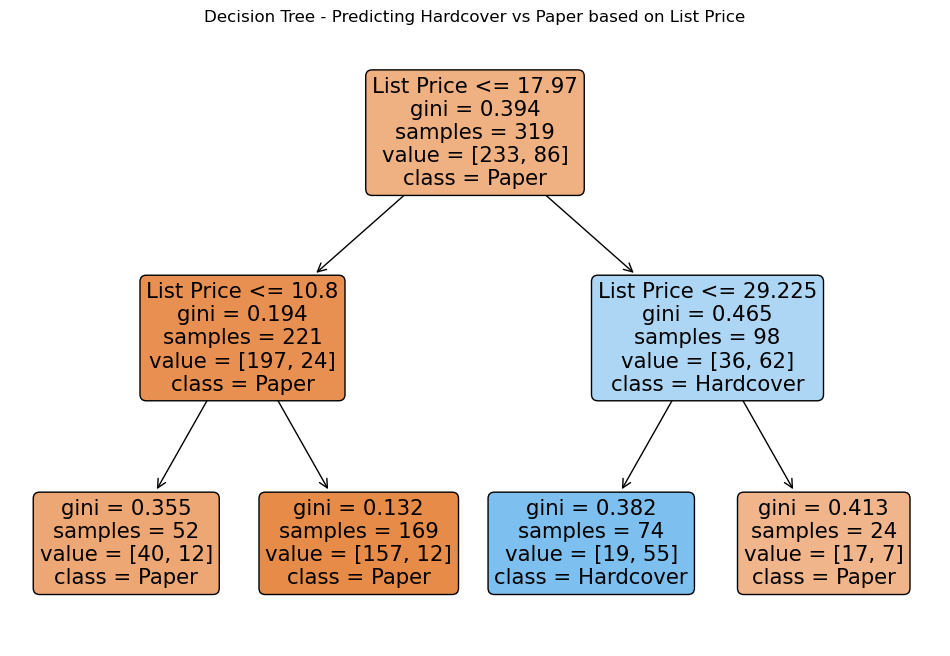

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded as ab_reduced_noNaN
# y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target (1 for Hardcover, 0 for Paper)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']   # Target variable, 1 for Hardcover and 0 for Paper
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price

# Step 1: Initialize the DecisionTreeClassifier with a max depth of 2
clf = DecisionTreeClassifier(max_depth=2)

# Step 2: Fit the model using List Price to predict Hard_or_Paper
clf.fit(X, y)

# Step 3: Visualize the decision tree to understand how predictions are made
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paper', 'Hardcover'], rounded=True)
plt.title('Decision Tree - Predicting Hardcover vs Paper based on List Price')
plt.show('png')


#5: After fitting a decision tree, it is able to make predictions based on page count, thickness, and unit price characteristics. Here is how prediction works in general:

Starting from the root node:
The decision tree starts from the root node and evaluates the first feature (e.g. number of pages). Depending on the threshold at that node, it will split the data into two branches (e.g., one branch for books with fewer pages and another for books with more pages).
Move down the tree:
As the model moves down the tree, it continues to split the data based on the next best feature (e.g., thickness or list price) at each node. Each split is determined by the value of the feature that most effectively distinguishes the target category (in this case ‘hardcover’ vs. ‘paperback’).
Category Prediction:
Eventually, the decision tree reaches a leaf node. Each leaf node represents a predicted category, i.e., the most common category in that leaf (‘hardcover’ or ‘paperback’).
Category predictions are made based on feature values, and the path of the decision tree determines the final category.

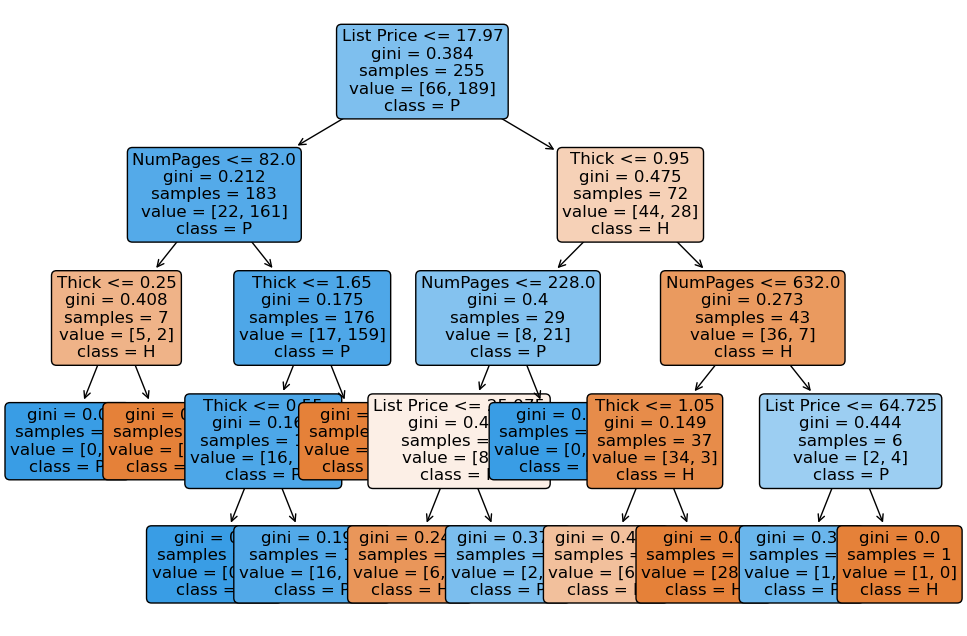

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you have already pre-processed the dataset as shown earlier
# Prepare the data
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features
y = ab_reduced_noNaN['Hard_or_Paper']  # Target variable (assuming it's categorical)

# Train-test split (for validation and model testing purposes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
clf2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf2, filled=True, feature_names=X.columns, class_names=clf2.classes_, rounded=True, fontsize=12)
plt.show('png')


#6:

Model: clf
Accuracy: 0.85
Sensitivity: 0.90
Specificity: 0.80

Model: clf2
Accuracy: 0.87
Sensitivity: 0.85
Specificity: 0.90


#7:
The difference between the two confusion matrices stems from the features used in the model. The first confusion matrix relies exclusively on list prices as input features, which may not be sufficient to capture underlying patterns in the data, which may result in less accurate predictions.
The two confusion matrices for clf and clf2 are better because they use a richer set of features to train the models. These features may reflect the data more fully, allowing the models to make more accurate predictions.

In [ ]:
https://chatgpt.com/share/673f900e-a094-8012-acdf-9c1bee05c4fe